In [1]:
import numpy as np
import pandas as pd

In [2]:
X=np.array([5.1,3.5,7.1,6.2,8.8,7.8,4.5,5.6,8.0,6.4]).reshape(-1, 1)
Y=np.array([1907,1287,2700,2373,3260,3000,1947,2273,3113,2493]).reshape(-1, 1)

In [3]:
X

array([[ 5.1],
       [ 3.5],
       [ 7.1],
       [ 6.2],
       [ 8.8],
       [ 7.8],
       [ 4.5],
       [ 5.6],
       [ 8. ],
       [ 6.4]])

In [4]:
x1=np.array([0.4,0.4,3.1,0.6,4.7,1.7,9.4,10.1,11.6,12.6,10.9,23.1,23.1,21.6,23.1,1.9,26.8,29.9]) 
x2=np.array([52,23,19,34,24,65,44,31,29,58,37,46,50,44,56,36,58,51]) 
x3=np.array([158,163,37,157,59,123,46,117,173,112,111,114,134,73,168,143,202,124]) 
y=np.array([64,60,71,61,54,77,81,93,93,51,76,96,77,93,95,54,168,99]) 

In [5]:
#画散点图
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [6]:
##利用现有库求解
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

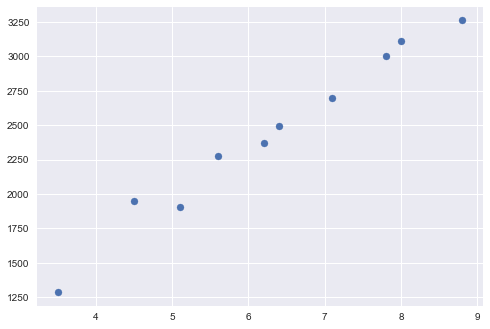

In [7]:
plt.scatter(X,Y)
plt.show()

In [8]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
linreg.predict(7)

array([[ 2690.2273743]])

In [10]:
#查看各个数据与Y的相关系数
np.corrcoef(x1,x2)

array([[ 1.       ,  0.4680225],
       [ 0.4680225,  1.       ]])

In [11]:
np.corrcoef(x2,x3)

array([[ 1.        ,  0.31524248],
       [ 0.31524248,  1.        ]])

In [12]:
np.corrcoef(x1,x3)

array([[ 1.        ,  0.15196394],
       [ 0.15196394,  1.        ]])

以上比较相关性系数比较高的是x1 x2，后面调整可以在此动手

In [13]:
from pandas import DataFrame
#这里数据不大，不划分测试集和训练集了
nest_dict = {'x2':x2,'x3':x3}#,'x2':x2 调整参数
data = DataFrame(nest_dict)

In [14]:
data

,x2,x3
0,52,158
1,23,163
2,19,37
3,34,157
4,24,59
5,65,123
6,44,46
7,31,117
8,29,173
9,58,112


In [15]:
data_train,y_train = data[:12],y[:12]

In [16]:
data_train,y_train

(    x2   x3
 0   52  158
 1   23  163
 2   19   37
 3   34  157
 4   24   59
 5   65  123
 6   44   46
 7   31  117
 8   29  173
 9   58  112
 10  37  111
 11  46  114, array([64, 60, 71, 61, 54, 77, 81, 93, 93, 51, 76, 96]))

In [17]:
data_test,y_test = data[12:],y[12:]

In [18]:
data_test,y_test

(    x2   x3
 12  50  134
 13  44   73
 14  56  168
 15  36  143
 16  58  202
 17  51  124, array([ 77,  93,  95,  54, 168,  99]))

In [20]:
linreg2=LinearRegression()
linreg2.fit(data_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = linreg2.predict(data_test)

In [22]:
#误差评估
from sklearn import metrics

In [23]:
#标准差 MAE: 17.4100767549 x1 x2 x3 都有时，x1 x3 17.5069181342 x2 x3时
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

MAE: 30.7529838331


In [24]:
#平方差  807.194598218 x1 x2 x3 都有时，x1 x3 790.451878664
print("MSE:",metrics.mean_squared_error(y_test,y_pred))

MSE: 1781.08121335


In [25]:
#方差 28.4111703071  28.1149760566
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 42.2028578813
